In [1]:
! pip install tensorflow

  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\18\ea\5e\e36e1b8739e78cd2eba0a08fdc602c2b16a4b263912af8cb64
  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\9a\1f\0e\3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
Successfully built termcolor absl-py gast


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/d

In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000000010F9B400>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000120C1710>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000000006A02EB8>)

In [4]:
print(dir(mnist))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_fields', '_make', '_replace', '_source', 'count', 'index', 'test', 'train', 'validation']


In [5]:
print(dir(mnist.train))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']


In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


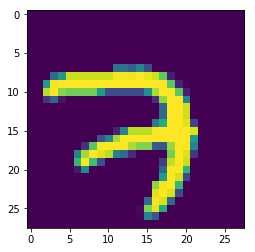

In [8]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(sample_image)

In [9]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [10]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [11]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [12]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [13]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [14]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [15]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [16]:
pred = multilayer_perceptron(x, weights, biases)

In [17]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [18]:
init = tf.global_variables_initializer()

In [19]:
Xsamp,ysamp = mnist.train.next_batch(100)

In [20]:
Xsamp.shape

(100, 784)

In [21]:
ysamp.shape

(100, 10)

In [22]:
Xsamp,ysamp = mnist.train.next_batch(1)

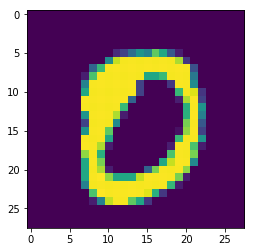

In [23]:
sample_image = Xsamp.reshape((28,28))
plt.imshow(sample_image)

In [24]:
ysamp

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
y

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [26]:
pred

<tf.Tensor 'add_2:0' shape=(?, 10) dtype=float32>

In [27]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [28]:
correct_predictions

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [29]:
correct_predictions = tf.cast(correct_predictions, "float")

In [30]:
accuracy = tf.reduce_mean(correct_predictions)

In [31]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [32]:
# Start the session
with tf.Session() as sess:
    
    # Intialize all the variables
    sess.run(init)

    for epoch in range(training_epochs):

        # Initial the cost = 0.0
        avg_cost = 0.0

        total_batch = int(n_samples/batch_size)

        for i in range(total_batch):

            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))
    print(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=147.24263364618452
Epoch: 2 cost=57.525037791512304
Epoch: 3 cost=42.882276125821186
Epoch: 4 cost=35.18514755422422
Epoch: 5 cost=29.938363587206094
Epoch: 6 cost=26.270296014222247
Epoch: 7 cost=23.28003679969093
Epoch: 8 cost=21.118173128474858
Epoch: 9 cost=19.20924246267838
Epoch: 10 cost=17.562148612629287
Epoch: 11 cost=16.2069444407845
Epoch: 12 cost=14.997819293087163
Epoch: 13 cost=14.059020807851429
Epoch: 14 cost=13.093359111330729
Epoch: 15 cost=12.305078910372481
0.908
Training Completed in 15 Epochs


In [33]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz


In [34]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [35]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

In [36]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

In [37]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

In [38]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

In [39]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [40]:
init = tf.global_variables_initializer()

In [41]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard2/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=147.96889529488297
Epoch: 2 cost=54.86905582427978
Epoch: 3 cost=40.9968935931813
Epoch: 4 cost=33.76505600148982
Epoch: 5 cost=28.850167244997888
Epoch: 6 cost=25.281023020094096
Epoch: 7 cost=22.58463800053706
Epoch: 8 cost=20.41862362212051
Epoch: 9 cost=18.55831642584367
Epoch: 10 cost=17.10417472221635
Epoch: 11 cost=15.792815682021038
Epoch: 12 cost=14.67900391405278
Epoch: 13 cost=13.73546918002041
Epoch: 14 cost=12.861662544553923
Epoch: 15 cost=12.07129249435933
Training Completed in 15 Epochs


In [42]:
! pip install keras

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
import keras

Using TensorFlow backend.


In [44]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 15s 1us/step


In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
y_train.shape

(60000,)

In [48]:
y_train[0]

5

In [49]:
x_test.shape

(10000, 28, 28)

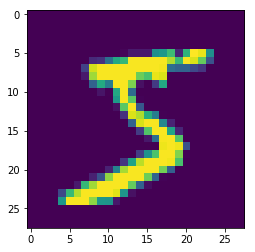

In [50]:
plt.imshow(x_train[0])

In [51]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [52]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [55]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [56]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [57]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [59]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 45us/step - loss: 1.0676 - acc: 0.7464 - val_loss: 0.4884 - val_acc: 0.8752
Epoch 2/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.4197 - acc: 0.8884 - val_loss: 0.3514 - val_acc: 0.9043
Epoch 3/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3403 - acc: 0.9054 - val_loss: 0.3063 - val_acc: 0.9170
Epoch 4/15
60000/60000 [==============================] - 2s 28us/step - loss: 0.3030 - acc: 0.9143 - val_loss: 0.2819 - val_acc: 0.9218
Epoch 5/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.2784 - acc: 0.9213 - val_loss: 0.2596 - val_acc: 0.9279
Epoch 6/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2592 - acc: 0.9268 - val_loss: 0.2470 - val_acc: 0.9302
Epoch 7/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2431 - acc: 0.9309 - val_loss: 0.2328 - val_acc

In [ ]:
predicted = np.argmax(model.predict(x_test), 1)

In [11]:
from  PIL import Image
img = Image.open('C:\\Users\\user\\bw.jpg').convert('L')

In [12]:
import numpy as np
print(type(img), np.min(img), np.max(img))

<class 'PIL.Image.Image'> 12 255


In [14]:
img = np.array(img) 
img.shape

(400, 400)

In [15]:
img

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

In [17]:
from  PIL import Image
img = Image.open('bw.jpg')

In [18]:
import keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [23]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [24]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [25]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [26]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.2442 - acc: 0.9296 - val_loss: 0.1163 - val_acc: 0.9643
Epoch 2/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.0932 - acc: 0.9714 - val_loss: 0.0930 - val_acc: 0.9708
Epoch 3/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.0607 - acc: 0.9807 - val_loss: 0.0797 - val_acc: 0.9739
Epoch 4/15
60000/60000 [==============================] - 3s 58us/step - loss: 0.0437 - acc: 0.9857 - val_loss: 0.0806 - val_acc: 0.9745
Epoch 5/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0310 - acc: 0.9907 - val_loss: 0.0728 - val_acc: 0.9782
Epoch 6/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.0246 - acc: 0.9921 - val_loss: 0.0815 - val_acc: 0.9746
Epoch 7/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.0221 - acc: 0.9925 - val_loss: 0.0737 - val_acc

In [13]:
import requests
res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format('周子瑜', 200))
res

<Response [200]>

In [ ]:
###使用CNN 辨識手寫數字

In [29]:
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
##資料前處理

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [32]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [33]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [34]:
model = keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 27s 451us/step - loss: 0.2116 - acc: 0.9384 - val_loss: 0.0923 - val_acc: 0.9717
Epoch 2/15
60000/60000 [==============================] - 25s 425us/step - loss: 0.0687 - acc: 0.9792 - val_loss: 0.0682 - val_acc: 0.9782
Epoch 3/15
60000/60000 [==============================] - 26s 426us/step - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0535 - val_acc: 0.9820
Epoch 4/15
60000/60000 [==============================] - 26s 428us/step - loss: 0.0315 - acc: 0.9905 - val_loss: 0.0432 - val_acc: 0.9854
Epoch 5/15
60000/60000 [==============================] - 26s 426us/step - loss: 0.0229 - acc: 0.9931 - val_loss: 0.0428 - val_acc: 0.9860
Epoch 6/15
60000/60000 [==============================] - 26s 429us/step - loss: 0.0167 - acc: 0.9949 - val_loss: 0.0562 - val_acc: 0.9827
Epoch 7/15
60000/60000 [==============================] - 25s 422us/step - loss: 0.0126 - acc: 0.9963 - val_loss: 0.

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [5]:
path = 'idol1/'
for link in soup.select('img'):
    res = requests.get(link.get('src'))
    fname = path + link.get('src').split('tbn:')[1] +'.jpg'
    with open(fname, 'wb') as f:
        f.write(res.content)

In [7]:
import requests
from bs4 import BeautifulSoup
for n in range(0,3):
    res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format('周子瑜', n * 100))
    soup = BeautifulSoup(res.text, 'lxml')
    path = 'idol1/'
    for link in soup.select('img'):
        res = requests.get(link.get('src'))
        fname = path + link.get('src').split('tbn:')[1] +'.jpg'
        with open(fname, 'wb') as f:
            f.write(res.content)

In [8]:
import requests
from bs4 import BeautifulSoup
def getIdolPicture(path, idol):
    for n in range(0,3):
        res = requests.get('https://www.google.com.tw/search?ei=lqfnW4axMZLI8wX1o7T4Cw&yv=3&q={}&tbm=isch&vet=10ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ.lqfnW4axMZLI8wX1o7T4Cw.i&ved=0ahUKEwiG1NOnuMveAhUS5LwKHfURDb8QuT0IgQEoAQ&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format(idol, n * 100))
        soup = BeautifulSoup(res.text, 'lxml')
        #path = 'idol1/'
        for link in soup.select('img'):
            res = requests.get(link.get('src'))
            fname = path + link.get('src').split('tbn:')[1] +'.jpg'
            with open(fname, 'wb') as f:
                f.write(res.content)

In [9]:
getIdolPicture('idol2/', '郭雪芙')

In [10]:
getIdolPicture('idol3/', '蔡依林')